**import necessary librariest** **bold text**

In [1]:
from os import ST_NOSUID
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import glob
from skimage.transform import resize
from sklearn.utils import shuffle

**load images using glob**

In [2]:
with_mask=glob.glob("/content/drive/MyDrive/Face Mask Detection/with_mask 1/with_mask 1/*.jpg")
with_out_mask=glob.glob("/content/drive/MyDrive/Face Mask Detection/without_mask/without_mask/*.jpg")


**check the number of images in with_mask and with_out_mask**

In [3]:
print(f"number of images \n with_mask:{len(with_mask)} \n with_out_mask: {len(with_out_mask)}")

number of images 
 with_mask:1693 
 with_out_mask: 1792


**Create a list with image and a seperate on with its corresponding labels**

In [4]:
image=[]
label=[]
for i in with_mask:
  img=plt.imread(i)
  image.append(img)
  label.append(0)
for i in with_out_mask:
  img=plt.imread(i)
  image.append(img)
  label.append(1)

**shuffle both images and labels**

In [5]:
image,label=shuffle(image,label,random_state=100)

**plot few images of both categories**

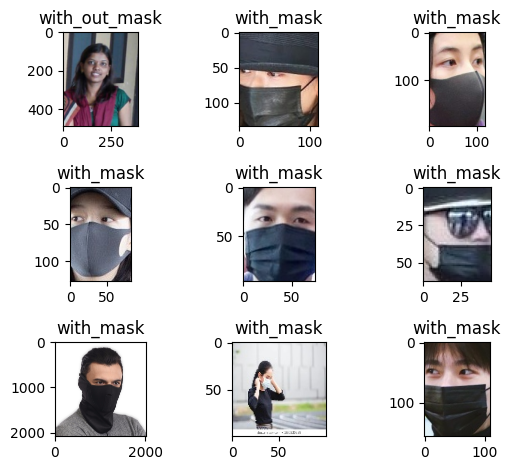

In [6]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(image[i])
  if label[i]==0:
    plt.title("with_mask")
  else:
    plt.title("with_out_mask")
  plt.tight_layout()

**resize images**

In [7]:
X=[]
for i in image:
  X.append(resize(i,(64,64,3)))
X=np.array(X)


**plot some resized images**

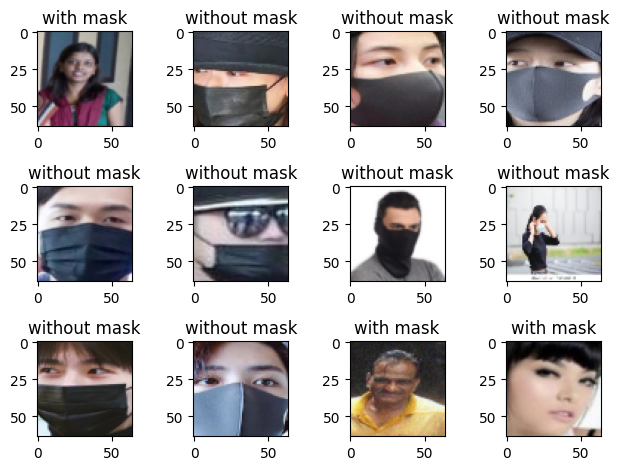

In [24]:
for i in range(12):
    plt.subplot(3,4,i+1)#we can't draw 0th image(in iteration 1st i would be 0)that why i+1
    plt.imshow(X[i])
    if y[i]==0:
        plt.title("without mask")
    else:
        plt.title("with mask")

plt.tight_layout()
plt.show()


**convert label into numpy arrays**

In [9]:
y=np.array(label)


**split the dataset into train and test set**

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

**check the datatype of X_train,y_train**

In [11]:
print(f"type of X_train{type(X_train)}\n type of y_train{type(y_train)}")

type of X_train<class 'numpy.ndarray'>
 type of y_train<class 'numpy.ndarray'>


**check the shape of X_train,y_train**

In [12]:
print("shape of X_train",X_train.shape)
print("shape of y_train",y_train.shape)

shape of X_train (2788, 64, 64, 3)
shape of y_train (2788,)


**create Keras Sequential model with 2 convolution layer , Flatten and hidden layer**

In [29]:
from tensorflow.keras import Sequential,layers
model = Sequential()

model.add(layers.Conv2D(16,(3,3), activation = 'relu', input_shape =(64,64,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(32,(3,3), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**compile our model**

In [30]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

**check model summary**

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 408,673 (1.56 MB)

 Trainable params: 408,673 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

**train the model**

In [32]:
model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.7754 - loss: 0.4868 - val_accuracy: 0.9344 - val_loss: 0.1983
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9327 - loss: 0.1941 - val_accuracy: 0.9303 - val_loss: 0.1884
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9476 - loss: 0.1463 - val_accuracy: 0.9467 - val_loss: 0.1680
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9490 - loss: 0.1331 - val_accuracy: 0.9426 - val_loss: 0.1414
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9510 - loss: 0.1297 - val_accuracy: 0.9467 - val_loss: 0.1725
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9708 - loss: 0.0914 - val_accuracy: 0.9590 - val_loss: 0.1169
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9755 - loss: 0.0699 - val_accuracy: 0.9549 - val_loss: 0.1106
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9895 - loss: 0.0370 - val_accuracy: 0.9590 - val_loss

**Evaluate our model**

In [17]:
model.evaluate(X_train,y_train)

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9962 - loss: 0.0202


[0.03176822513341904, 0.9924677014350891]

**make predictions with X_test**

In [37]:
y_pred=(model.predict(X_test) > 0.5).astype(int)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [38]:
y_pred[:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

**Plot X_test with label from our prediction**

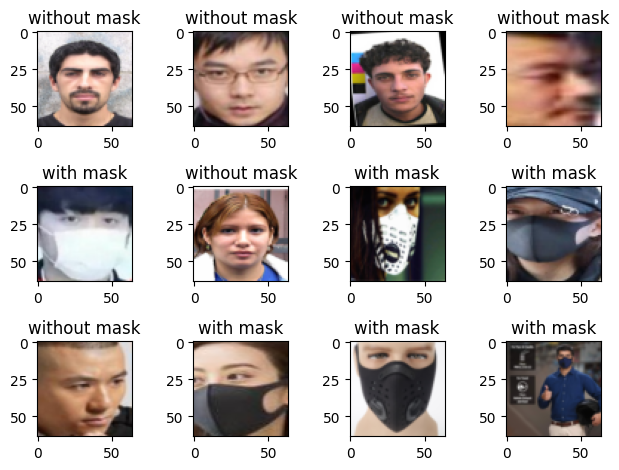

In [41]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    if y_pred[i]==1:
        plt.title("without mask")
    else:
        plt.title("with mask")

plt.tight_layout()
plt.show()

**confusion metrics**

<Axes: >

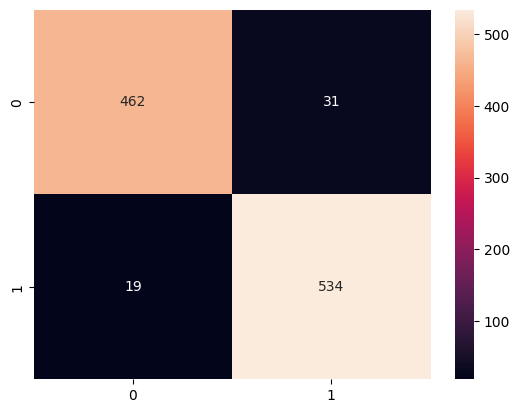

In [43]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")